<a href="https://colab.research.google.com/github/rodrigomluz/codekdata/blob/main/moncton_weather.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##WEATHER IN MONCTON, NB, CANADA.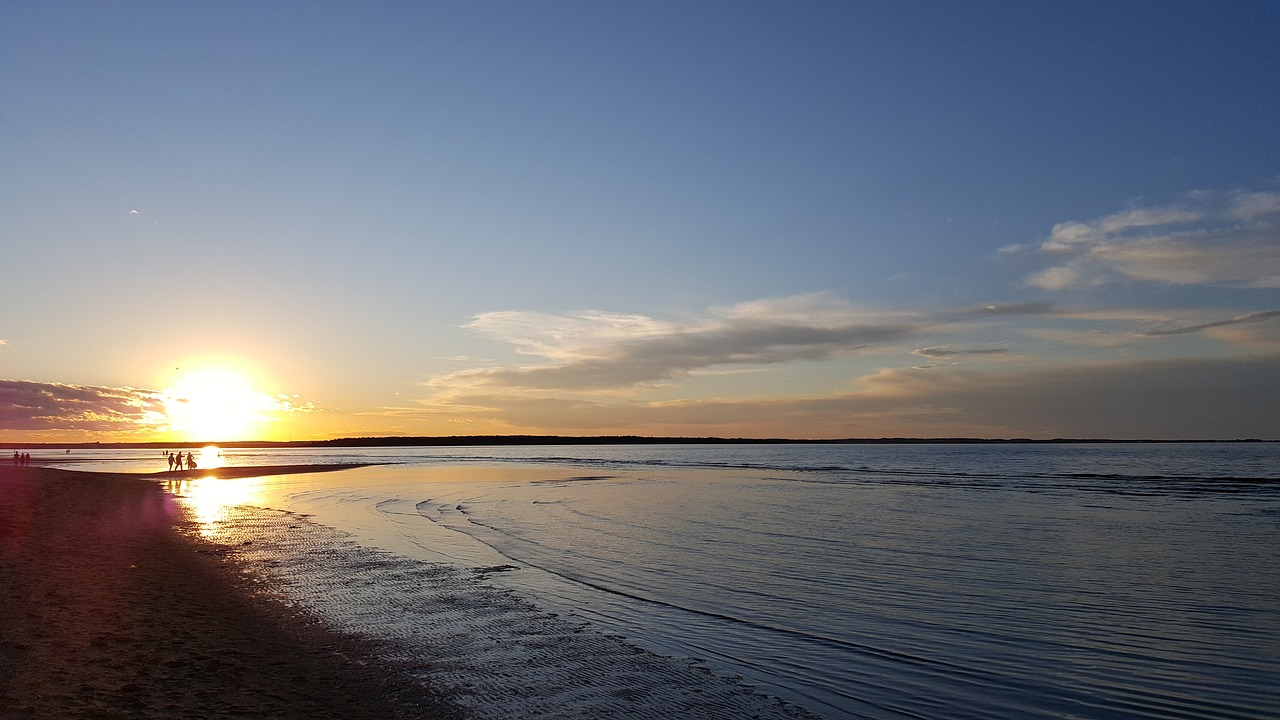

In [81]:
#import the libraries

from bs4 import BeautifulSoup as bs
import requests
import pandas as pd

pd.options.display.max_columns = None


In [4]:
#requests the page weather

r = requests.get('https://www.yahoo.com/news/weather/canada/moncton/moncton-3796')

soup = bs(r.content, 'html.parser')

In [84]:
items = soup.find_all(class_='BdB Bds(d) Bdbc(#fff.12) Fz(1.2em) Py(2px) O(0) Pos(r) forecast-item')


print(items[0].find(class_='D(ib) Va(m) W(1/4)').get_text())
print(items[0].find(class_="day-part Mah(0) forecast-item:f_Mah(100px) Trsdu(.1s) Fz(.9em) D(b) Ov(h) forecast-item:f_My(10px)").get_text())
print(items[0].find(class_='M(5px) D(ib)').get_text())
print(items[0].find(class_='high D(ib) Miw(32px)').get_text())
print(items[0].find(class_='low Pstart(10px) C(#a5d6ff) D(ib) Miw(32px)').get_text())


Saturday
Partly cloudy with a high of 39 °F (3.9 °C). Winds WNW at 11 mph (17.7 kph).
0%
47°
28°


##**The temperature fahrenheit**

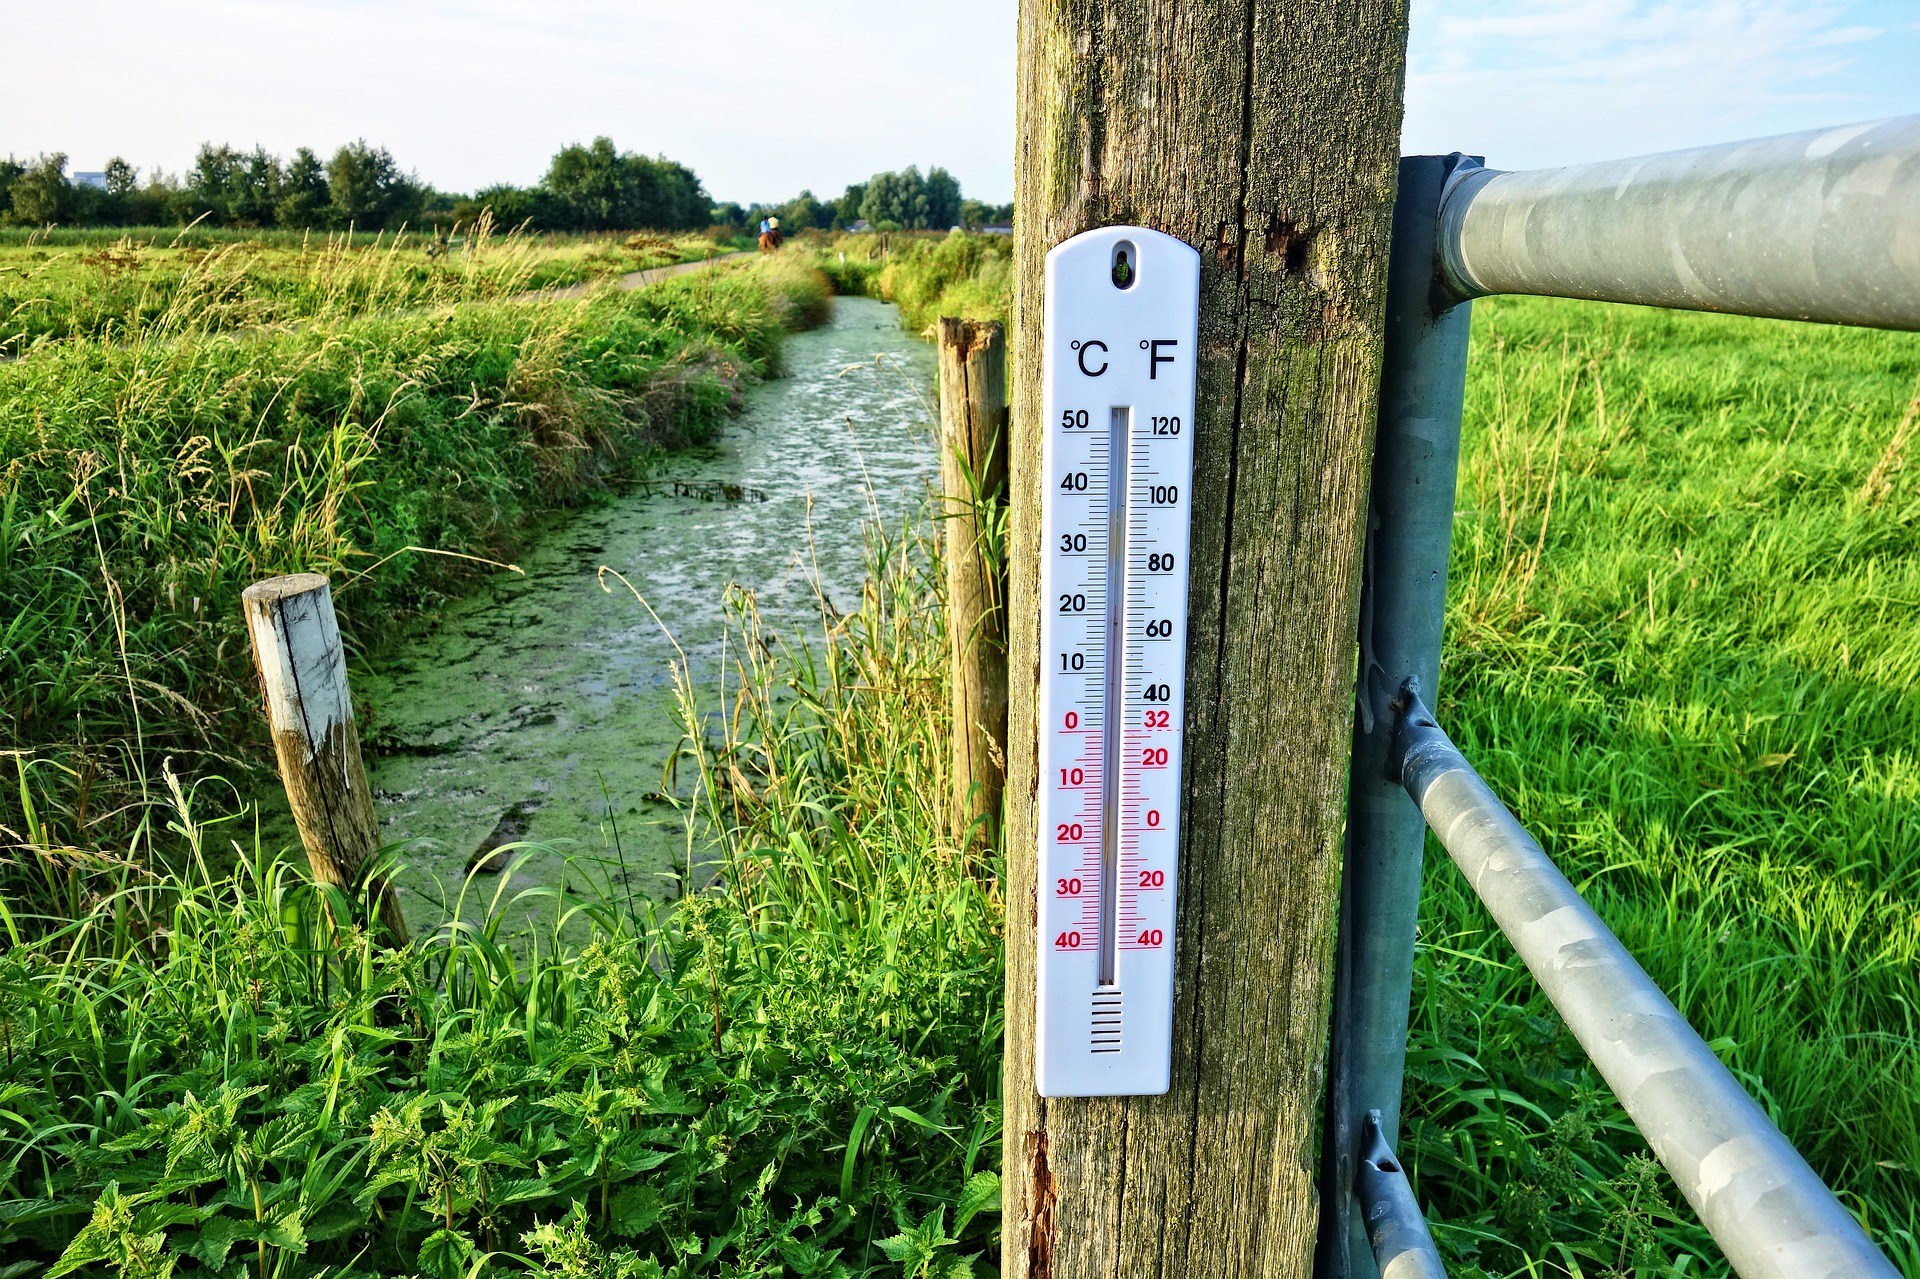

In [63]:
#list comprehension python for loop

week_days = [item.find(class_='D(ib) Va(m) W(1/4)').get_text() for item in items]
desc = [item.find(class_='day-part Mah(0) forecast-item:f_Mah(100px) Trsdu(.1s) Fz(.9em) D(b) Ov(h) forecast-item:f_My(10px)').get_text() for item in items]
precipitation = [item.find(class_='M(5px) D(ib)').get_text() for item in items]
high_temp = [item.find(class_='high D(ib) Miw(32px)').get_text() for item in items]
low_temp = [item.find(class_='low Pstart(10px) C(#a5d6ff) D(ib) Miw(32px)').get_text() for item in items]

In [64]:
## test lists

print(week_days)
print(desc)
print(precipitation)
print(high_temp)
print(low_temp)

['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday']
['Partly cloudy with a high of 39 °F (3.9 °C). Winds WNW at 11 mph (17.7 kph).', 'Mostly sunny today with a high of 35 °F (1.7 °C) and a low of 24 °F (-4.4 °C).', 'Showers today with a high of 51 °F (10.6 °C) and a low of 29 °F (-1.7 °C).  There is a 55% chance of precipitation.', 'Rain and snow today with a high of 49 °F (9.4 °C) and a low of 24 °F (-4.4 °C).  There is a 75% chance of precipitation.', 'Partly cloudy today with a high of 29 °F (-1.7 °C) and a low of 20 °F (-6.7 °C).  There is a 25% chance of precipitation.', 'Snow showers today with a high of 38 °F (3.3 °C) and a low of 29 °F (-1.7 °C).  There is a 40% chance of precipitation.', 'Showers today with a high of 46 °F (7.8 °C) and a low of 35 °F (1.7 °C).  There is a 70% chance of precipitation.', 'Scattered showers today with a high of 44 °F (6.7 °C) and a low of 29 °F (-1.7 °C).  There is a 45% chance of precipi

In [85]:
# creating a dict

moncton_weather = pd.DataFrame({
    'Week days':week_days,
    'Description weather':desc,
    'Precipitation':precipitation,
    'Highest temperature/°F':high_temp,
    'Lowest temperature/°F':low_temp
})

In [86]:

moncton_weather

,Week days,Description weather,Precipitation,Highest temperature/°F,Lowest temperature/°F
0,Saturday,Partly cloudy with a high of 39 °F (3.9 °C). W...,0%,47°,28°
1,Sunday,Mostly sunny today with a high of 35 °F (1.7 °...,0%,35°,24°
2,Monday,Showers today with a high of 51 °F (10.6 °C) a...,55%,51°,29°
3,Tuesday,Rain and snow today with a high of 49 °F (9.4 ...,75%,49°,24°
4,Wednesday,Partly cloudy today with a high of 29 °F (-1.7...,25%,29°,20°
5,Thursday,Snow showers today with a high of 38 °F (3.3 °...,40%,38°,29°
6,Friday,Showers today with a high of 46 °F (7.8 °C) an...,70%,46°,35°
7,Saturday,Scattered showers today with a high of 44 °F (...,45%,44°,29°
8,Sunday,Partly cloudy today with a high of 37 °F (2.8 ...,0%,37°,26°
9,Monday,Rain and snow today with a high of 46 °F (7.8 ...,75%,46°,32°


In [87]:
moncton_weather.to_csv('moncton_weather.csv')